In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd

In [25]:
import datetime as dt
from scipy import stats
from numpy import mean

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#inspector = inspect(engine)
#inspector.get_table_names()
#['measurement', 'station']

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

Measurement = Base.classes.measurement
Station = Base.classes.station

session = Session(engine)

#first_row = session.query(Dow).first()
#first_row.__dict__

first_row = session.query(Measurement).first()
first_row.__dict__

#first_rowS = session.query(Station).first()
#first_rowS.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22ddbcac630>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [6]:
# reflect an existing database into a new model




# reflect the tables

first_rowS = session.query(Station).first()
first_rowS.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22ddbcac668>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [ ]:
# We can view all of the classes that automap found


In [ ]:
# Save references to each table


In [ ]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [7]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [8]:
# Latest Date
from datetime import datetime, timedelta

lastday = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

#ldy = datetime(lastday) - timedelta(days = 365)
lday = str(lastday)

#datetime(lastday)
#lastday

#datetime.strptime(lday, '%Y-%m-%d')

In [50]:
#session.query(Measurement.date).filter(Measurement.date > '2016-08-23').order_by(Measurement.date).first()
#session.query(Measurement.date,Measurement.tobs,).filter(Measurement.date > '2016-08-23').order_by(Measurement.date)\
#        .limit(5).all()


results = session.query(Measurement.date,Measurement.tobs,Measurement.prcp).filter(Measurement.date > '2016-08-23')\
        .filter(Measurement.prcp > 0)\
        .order_by(Measurement.date).all()

#results2 = results.group_by(Measurement.date).sum()
results

[('2016-08-24', 79.0, 0.08),
 ('2016-08-24', 76.0, 2.15),
 ('2016-08-24', 80.0, 2.28),
 ('2016-08-24', 79.0, 1.22),
 ('2016-08-24', 77.0, 2.15),
 ('2016-08-24', 74.0, 1.45),
 ('2016-08-25', 80.0, 0.08),
 ('2016-08-25', 77.0, 0.08),
 ('2016-08-25', 80.0, 0.21),
 ('2016-08-25', 80.0, 0.06),
 ('2016-08-25', 77.0, 0.11),
 ('2016-08-26', 78.0, 0.03),
 ('2016-08-26', 81.0, 0.02),
 ('2016-08-26', 81.0, 0.04),
 ('2016-08-26', 80.0, 0.01),
 ('2016-08-27', 73.0, 0.18),
 ('2016-08-27', 81.0, 0.02),
 ('2016-08-27', 75.0, 0.12),
 ('2016-08-28', 78.0, 0.01),
 ('2016-08-28', 73.0, 0.14),
 ('2016-08-28', 81.0, 0.14),
 ('2016-08-28', 80.0, 0.14),
 ('2016-08-28', 73.0, 0.6),
 ('2016-08-28', 71.0, 2.07),
 ('2016-08-29', 78.0, 0.17),
 ('2016-08-29', 80.0, 0.04),
 ('2016-08-29', 78.0, 0.35),
 ('2016-08-29', 78.0, 0.9),
 ('2016-08-30', 79.0, 0.02),
 ('2016-08-30', 75.0, 0.05),
 ('2016-08-31', 80.0, 0.13),
 ('2016-08-31', 77.0, 0.1),
 ('2016-08-31', 78.0, 0.25),
 ('2016-08-31', 78.0, 0.24),
 ('2016-08-31', 7

In [42]:
#---emoji_id = [result[1] for result in results[:10]]
#---scores = [int(result[2]) for result in results[:10]]

n_date = [result[0] for result in results]
n_tobs = [int(result[1]) for result in results]
n_prcp = [int(result[2]) for result in results]


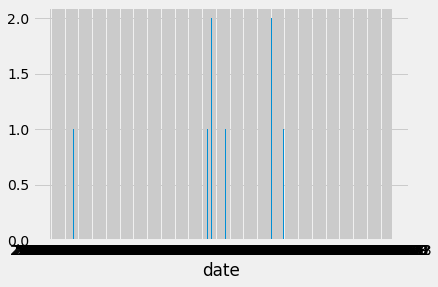

In [48]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
#fig, ax = plt.subplots()
#ypos = range(1, len(n_date)+1)
#ax.barh(n_dateypos, scores[::-1])
#ax.set_xlabel("score")
#ax.set_ylabel("emoji")
#ax.set_yticks(ypos)
#ax.set_yticklabels(emoji_id[::-1])
#ax.set_title("Emoji Scores")
#fig.tight_layout()
#plt.show()


fig, ax = plt.subplots()
#ypos = range(1, len(n_date)+1)
ax.bar(n_date, n_prcp)
ax.set_xlabel("date")
#ax.set_ylabel("emoji")
#ax.set_yticks(ypos)
#ax.set_yticklabels(emoji_id[::-1])
#ax.set_title("Emoji Scores")
#fig.tight_layout()
plt.show()

In [60]:
df = pd.DataFrame(results, columns=['n_date', 'n_tobs', 'n_prcp'])
df.set_index('n_date', inplace=True, )
df.head(10)
df2 = df.groupby(['n_date']).sum()
df2

,n_tobs,n_prcp
n_date,,
2016-08-24,465.0,9.33
2016-08-25,394.0,0.54
2016-08-26,320.0,0.10
2016-08-27,229.0,0.32
2016-08-28,456.0,3.10
...,...,...
2017-08-19,71.0,0.09
2017-08-20,80.0,0.01
2017-08-21,155.0,0.58


In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Earliest Date
#---   session.query(Measurement.date).order_by(Dow.date).first()
#---  print


# Latest Date
#---session.query(Measurement.date).order_by(Measurement.date.desc()).first()


#all dates greater than 2011-03-01
session.query(Dow.date).\
    filter(Dow.date > '2011-03-01').\
    order_by(Dow.date).all()




ly = session.query(Measurement).\
    filter(func.strftime("%y", Measurement.date) == "05")

#may_averages = session.query(*sel).\
#    filter(func.strftime("%m", Dow.date) == "05").\
#    group_by(Dow.stock).\
#    order_by(Dow.stock).all()
#may_averages


#for row in session.query(Measurement.prcp, Measurement.station).limit(15).all():
#    print(row)

#for row in session.query(Measurement.prcp, Measurement.station).limit(15).all():
#    print(row)



# Calculate the date 1 year ago from the last data point in the database





#------sort by date and subtract 1st by one year
#  filter using timedelta


# Perform a query to retrieve the data and precipitation scores
#  date & perc




# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

print(ly)

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE strftime(?, measurement.date) = ?


('2017-08-23')

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

In [ ]:
# Design a query to show how many stations are available in this dataset?
#   unique.count



In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?

#  group-by & .count
# List the stations and the counts in descending order.
# add order chain - highest one first



In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#use id as first & funct package (max min avg)


In [ ]:
# Choose the station with the highest number of temperature observations.

#

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram




## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax



# for your trip using the previous year's data for those same dates.





In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`


# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
